# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)







\begin{equation}
A = As - 2\frac{(r\cos\theta/2 )(r\sin\theta/2)}{2} 
\end{equation}


.

.

.




\begin{equation}
\theta-\sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

In [ ]:
f = lambda theta: theta-np.sin(theta)-np.pi/2

In [ ]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)


In [ ]:
df = pd.DataFrame()

df["theta"] = theta
df["F_theta"] = f(theta)

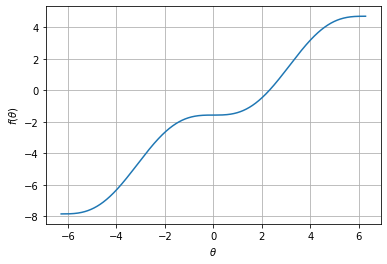

In [ ]:
plt.figure()
plt.plot(df["theta"], df["F_theta"] )
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.show()

In [ ]:
root = optimize.bisect(f, 0, 4)
print(f"EL ángulo es: {root:.5} ")

EL ángulo es: 2.3099 


In [ ]:
np.rad2deg(root)

132.3464588341314




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [7]:

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [8]:
#A continuación se definen las ecuaciones para X y Y.
#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 
    

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3
  


array([   0.        ,    8.32854088,   16.17543256,   23.54551569,
         30.4435823 ,   36.8743762 ,   42.84259359,   48.35288342,
         53.40984795,   58.01804317,   62.18197928,   65.90612117,
         69.19488883,   72.05265786,   74.48375986,   76.4924829 ,
         78.08307196,   79.25972937,   80.0266152 ,   80.38784772,
         80.34750381,   79.9096194 ,   79.07818982,   77.85717026,
         76.25047619,   74.26198367,   71.89552987,   69.15491334,
         66.04389448,   62.56619591,   58.72550281,   54.52546334,
         49.96968898,   45.06175494,   39.80520048,   34.20352928,
         28.26020984,   21.97867577,   15.36232618,    8.41452603,
          1.13860646,   -6.4621349 ,  -14.38443351,  -22.62505768,
        -31.18080819,  -40.04851796,  -49.22505175,  -58.70730582,
        -68.49220764,  -78.57671554,  -88.95781844,  -99.63253551,
       -110.59791587, -121.85103832, -133.38901098, -145.20897108,
       -157.3080846 , -169.68354598, -182.3325779 , -195.25243

In [ ]:
#Grafica de las ecuaciones


In [9]:
t = np.linspace(0, 20, 100) #Tiempo 
x = pos_x(t, theta, *Params)
y = pos_y(t, theta, *Params) 
pos = { "X": x , "Y": y, "Tiempo": t }
df = pd.DataFrame.from_dict(pos)


In [ ]:
plt.subplot?

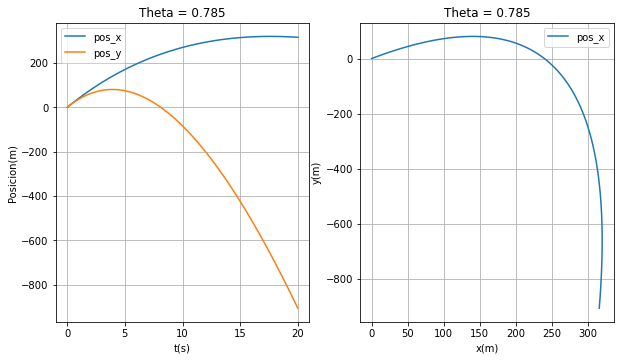

In [11]:
plt.figure(figsize=(10,5.5))
plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.xlabel("t(s)")
plt.ylabel("Posicion(m)")
plt.grid()
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
#plt.show()


plt.subplot(122)

plt.plot(df["X"], df["Y"], label="pos_x") 
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()
plt.show()

Text(0, 0.5, 'Posicion(m)')

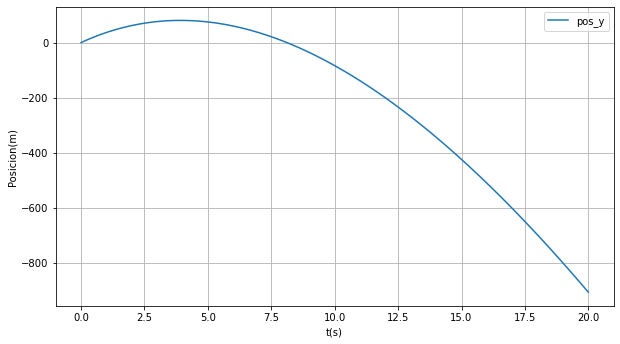

In [12]:
plt.figure(figsize=(10,5.5))
plt.plot(df["Tiempo"], df["Y"], label="pos_y") #Gráfico para Y vs t
plt.grid() 
plt.legend()
plt.xlabel("t(s)")
plt.ylabel("Posicion(m)")

In [13]:
from scipy import optimize #Se usará optimize para encontrar la raíz


In [14]:
f= lambda t: pos_y(t, theta, alpha, v0, b, u,g) #Función de y para encontrar la raíz.  

In [15]:
root = optimize.newton(f , 7) #Mirando el gráfico se mira que la raíz está cerca a 7.
root #raíz

8.111627022095576

In [16]:
t=root #En la siguiente ecuación se remplaza el t encontrado para encontrar la distancia máxima.
T1 = u * t * np.cos(alpha) #Termino 1
T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
T3 = (1 - np.e**(-b*t)) #Termino 3

x=T1 + T2*T3 
print('La distancia máxima es: %f' %x)


La distancia máxima es: 239.606149


In [20]:
def R(t, thet, alpha, v0, b, u,g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(thet) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 

In [146]:
#g= lambda thet: R(t, thet, alpha, v0, b, u,g)

In [23]:
l=list(range(10,95,5)) #Lista para intervalo de theta dados.
a=np.deg2rad(l)
thet=np.array(a)
y= R(t, thet, alpha, v0, b, u,g)

In [24]:
p = { "R(m)": y , "Theta(rad)": thet } #Data frame de R valor máximo y theta.
df = pd.DataFrame.from_dict(p)
df

,R,Theta
0,350.712361,0.174533
1,343.157835,0.261799
2,332.662113,0.349066
3,319.305075,0.436332
4,303.188376,0.523599
5,284.434674,0.610865
6,263.186695,0.698132
7,239.606149,0.785398
8,213.872500,0.872665
9,186.181595,0.959931


Text(0, 0.5, 'Posicion(m)')

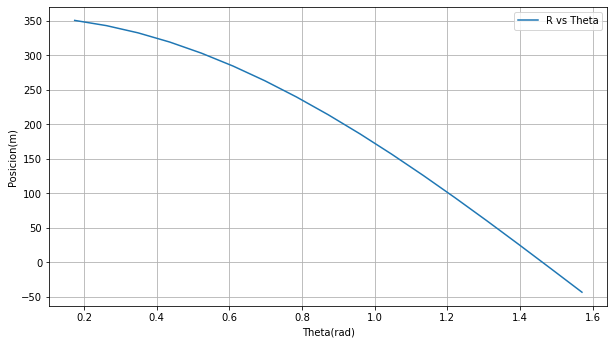

In [42]:
plt.figure(figsize=(10,5.5))
plt.plot(df["Theta"], df["R"], label="R vs Theta") #Gráfico para Y vs t
plt.grid() 
plt.legend()
plt.xlabel("Theta(rad)")
plt.ylabel("Posicion(m)")

In [27]:
from scipy.interpolate import lagrange #Se importa Lagrange 
y= R(t, thet, alpha, v0, b, u,g)
l=list(range(10,95,5))
a=np.deg2rad(l)
thet=np.array(a)b
poly= lagrange(thet, y) #Se usa la interpolación de Lagrange

In [32]:
x=np.linspace(0,2,10)

In [37]:
poly(x)

array([ 356.79067294,  346.95242097,  317.92148471,  271.12520324,
        208.86207593,  134.17940798,   50.69054991,  -37.70155509,
       -127.24097453, -214.97049802])

Text(0.5, 1.0, 'La línea indica el polinomio de interpolación')

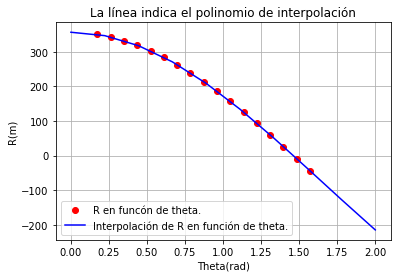

In [43]:
plt.plot(df["Theta"], df["R"], "ro",label="R en funcón de theta.") #Gráfica del R en función de theta
plt.plot(x, poly(x), "b-",label="Interpolación de R en función de theta.") #Gráfico para la interpolación de R como función de theta.
plt.xlabel("Theta(rad)")
plt.ylabel("R(m)")
plt.grid()
plt.legend()
plt.title("La línea indica el polinomio de interpolación")
